In [74]:
import cv2
import numpy as np
import math
import sys
from colormap import rgb2hex
from matplotlib import pyplot as plt
import time

In [2]:
def rgb2int(rgb):
    hex = rgb2hex(rgb[0], rgb[1], rgb[2])
    return int(hex[1:len(hex)], 16)

In [3]:
tempScaleImg = cv2.imread("TempScaleImg.jpg")
tempArr = np.array(tempScaleImg)
x = tempArr.shape[0] #Rows
y = tempArr.shape[1] #Cols

In [4]:
#Find the average rgb value in each row
tempAvgArr = tempArr[0:x, 0]
rgbScaleInt = np.empty([x])
for i in range(0, x):
     rgbScaleInt[i] = rgb2int(tempAvgArr[i])

In [5]:
tempRange = np.linspace(350, -50, x)

In [6]:
temp_dict = dict()

for e in range(0, x):
    temp_dict[rgbScaleInt[e]] = tempRange[e]

In [7]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return (array[idx], idx)

In [8]:
def get_temp(val):
    temp, idx = find_nearest(rgbScaleInt, val)
    return tempRange[idx]

In [9]:
def rgb_to_temp(image):
    img = cv2.imread(image)
    
    rgbArr = np.array(img)

    x = rgbArr.shape[0] #Rows
    y = rgbArr.shape[1] #Cols
    
    tempMapped = np.empty([x, y])
    
    for row in range(0, x):
        for col in range(0, y):
            tempMapped[row,col] = get_temp(rgb2int(rgbArr[row,col]))
            
    return tempMapped     

In [75]:
start = time.time()
temp = rgb_to_temp("sampleThermal.jpg");
end = time.time()
print(end-start)

7.2831130027771


In [11]:
print(temp)

[[ 25.96638655  25.96638655  25.96638655 ...  27.31092437  44.11764706
  324.45378151]
 [ 25.96638655  25.96638655  25.96638655 ...  27.31092437  44.11764706
  324.45378151]
 [ 25.96638655  25.96638655  25.96638655 ...  27.31092437  44.11764706
  324.45378151]
 ...
 [ 30.67226891  31.34453782  31.34453782 ...  32.01680672 321.09243697
  324.45378151]
 [ 30.67226891  31.34453782  31.34453782 ...  32.01680672 321.09243697
  324.45378151]
 [ 30.67226891  31.34453782  32.01680672 ...  32.01680672 321.09243697
  324.45378151]]


In [12]:
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.9.7 (default, Sep  3 2021, 12:37:55) 
[Clang 12.0.5 (clang-1205.0.22.9)]
Version info.
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [59]:
 img = cv2.imread("sampleThermal.jpg")

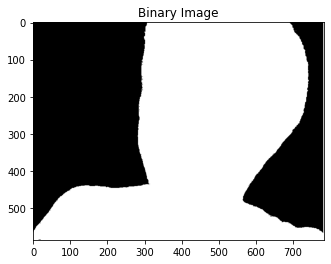

In [67]:
#Apply binary thresholding
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 55, 255, cv2.THRESH_BINARY)
#Visualize the binary image
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title('Binary Image')
plt.show()

[array([[[708,  23]]], dtype=int32), array([[[307,   0]],

       [[307,   1]],

       [[307,   2]],

       ...,

       [[310,   0]],

       [[309,   0]],

       [[308,   0]]], dtype=int32), array([[[770, 560]],

       [[771, 559]],

       [[772, 560]],

       [[771, 561]]], dtype=int32), array([[[688, 541]],

       [[689, 540]],

       [[690, 541]],

       [[689, 542]]], dtype=int32), array([[[ 19, 541]],

       [[ 20, 540]],

       [[ 21, 541]],

       [[ 20, 542]]], dtype=int32), array([[[635, 519]],

       [[636, 518]],

       [[637, 519]],

       [[636, 520]]], dtype=int32), array([[[633, 518]],

       [[634, 517]],

       [[635, 518]],

       [[634, 519]]], dtype=int32), array([[[ 46, 506]],

       [[ 47, 505]],

       [[ 48, 506]],

       [[ 47, 507]]], dtype=int32), array([[[592, 495]],

       [[593, 494]],

       [[594, 495]],

       [[593, 496]]], dtype=int32), array([[[ 64, 480]],

       [[ 65, 479]],

       [[ 66, 480]],

       [[ 65, 481]]], dt

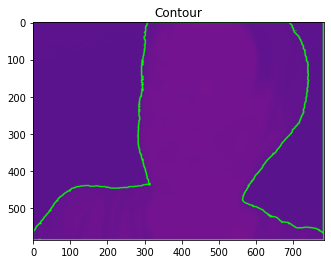

In [83]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method =cv2.CHAIN_APPROX_NONE)

image_cpy = img.copy()
cv2.drawContours(image=image_cpy, contours=contours, contourIdx=-1, color=(0,255,0),
                thickness=2, lineType=cv2.LINE_AA)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print(contours)
plt.imshow(cv2.cvtColor(image_cpy, cv2.COLOR_BGR2RGB))
plt.title('Contour')
plt.show()